jz3339<br>
Jia Zhang

# MNIST Sign Language

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [222]:
class SignLanguage:
    def __init__(self):
        self.model = None
        
        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()
    
    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """
        
        # TODO: Create a Sequential model
        model = Sequential() 
        
        # TODO: Compile the model with categorical_crossentropy
        model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(28,28,1)))
        model.add(MaxPooling2D(pool_size = (2, 2)))
        model.add(Dropout(0.2))
        
        model.add(Conv2D(512, kernel_size=3, activation='relu', input_shape=(28,28,1)))
        model.add(MaxPooling2D(pool_size = (2, 2)))
        model.add(Dropout(0.2))
        
        model.add(Conv2D(1024, kernel_size=3, activation='relu', input_shape=(28,28,1)))
        model.add(MaxPooling2D(pool_size = (2, 2)))
        model.add(Dropout(0.2))

        
        model.add(Flatten())
        model.add(Dense(512, activation = 'relu'))
        model.add(Dense(1024,activation='relu'))
        model.add(Dropout(0.23))
        model.add(Dense(num_classes, activation='softmax'))
        
        model.compile('adam', loss ='sparse_categorical_crossentropy',metrics =['accuracy'])

        self.model = model
    
    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)
        
        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        # TODO : split into training and validation set
        # TODO : reshape each example into a 2D image (28, 28, 1)
        x_train,x_test,y_train,y_test = train_test_split(images,
                                                labels,
                                                test_size=0.33,
                                                stratify=labels,
                                                random_state=1234)
        x_train=x_train.reshape(x_train.shape[0],28,28,1)
        x_test=x_test.reshape(x_test.shape[0],28,28,1)
        
        self.data = {
            "train": (x_train, y_train),
            "test" : (x_test, y_test)
        }
    
    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.
        
        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """
        x_train, y_train = self.data["train"]
        x_test, y_test = self.data["test"]
        
        print(x_train.shape)
        history = self.model.fit(x_train, 
                                 y_train, 
                                 validation_data=(x_test, y_test),
                                 batch_size=batch_size, 
                                 epochs=epochs, 
                                 verbose=verbose)
        
        return history
    
    def predict(self, data):
        """
        Use the trained model to predict labels for test data.
        
        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """
        
        # Don't forget to normalize the data in the same way as training data
        # self.model.predict() and np.argmax( , axis=1) might help
        data = data.reshape(data.shape[0],28,28,1)
        pred = np.argmax(self.model.predict(data), axis=1)
        return pred
    
    def visualize_data(self, data):
        """
        Visualizing the hand gestures
        
        :param data: numpy array of images
        """
        if data is None: return
        
        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object
        
        :param history: return value from model.fit()
        """
        if history is None: return
        
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Grading Script

Do NOT modify this section

In [223]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [224]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

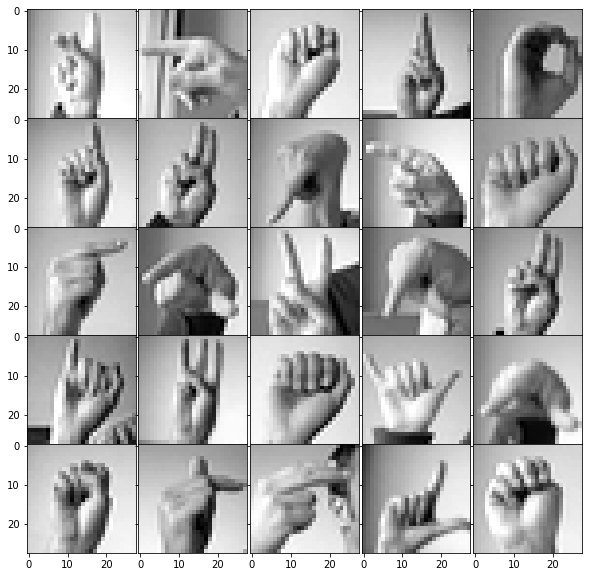

In [225]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

(18394, 28, 28, 1)
Epoch 1/30
144/144 [==============================] - 5s 27ms/step - loss: 3.3888 - accuracy: 0.2629 - val_loss: 0.9600 - val_accuracy: 0.6925
Epoch 2/30
144/144 [==============================] - 3s 24ms/step - loss: 0.7019 - accuracy: 0.7562 - val_loss: 0.1467 - val_accuracy: 0.9614
Epoch 3/30
144/144 [==============================] - 3s 24ms/step - loss: 0.2446 - accuracy: 0.9174 - val_loss: 0.0336 - val_accuracy: 0.9915
Epoch 4/30
144/144 [==============================] - 4s 26ms/step - loss: 0.1108 - accuracy: 0.9625 - val_loss: 0.0086 - val_accuracy: 0.9982
Epoch 5/30
144/144 [==============================] - 4s 26ms/step - loss: 0.0748 - accuracy: 0.9765 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 6/30
144/144 [==============================] - 4s 25ms/step - loss: 0.0554 - accuracy: 0.9825 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 7/30
144/144 [==============================] - 4s 26ms/step - loss: 0.0424 - accuracy: 0.9867 - val_loss: 0.0019 - v

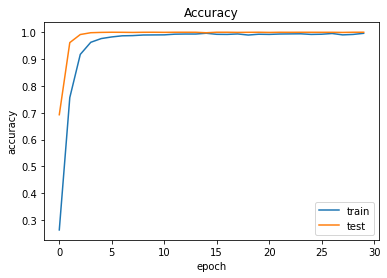

In [226]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [227]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

225/225 [==============================] - 2s 8ms/step
0.9520356943669828


In [231]:
# import numpy as np
# from tensorflow import keras


# model = keras.models.Sequential()

# model.add(Conv2D(16,(5,5), activation='relu', input_shape=(100, 100, 1)))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_113 (Conv2D)         (None, 96, 96, 16)        416       
                                                                 
 max_pooling2d_109 (MaxPooli  (None, 48, 48, 16)       0         
 ng2D)                                                           
                                                                 
Total params: 416
Trainable params: 416
Non-trainable params: 0
_________________________________________________________________
